# Importation des bibliothèques


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from mlp_model import MLP

# Importation du dataset 

In [3]:
# Chargement du dataset Iris
iris = datasets.load_iris()
X = iris.data  # Caractéristiques
y = iris.target.reshape(-1, 1)  # Labels

# Encodage one-hot des labels
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# Normalisation des caractéristiques
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)


# Creation and training of the model

Epoch 0, Loss: 0.24193414668115834
Epoch 20, Loss: 0.10418252534396129
Epoch 40, Loss: 0.0908660932425525
Epoch 60, Loss: 0.08795960419236518
Epoch 80, Loss: 0.08899183492089924
Epoch 100, Loss: 0.08938556308463991
Epoch 120, Loss: 0.08927457367122532
Epoch 140, Loss: 0.08869875162817867
Epoch 160, Loss: 0.0868989936665297
Epoch 180, Loss: 0.08161616284891864
Epoch 200, Loss: 0.07870571220448545
Epoch 220, Loss: 0.08374277196829809
Epoch 240, Loss: 0.08415950447694985
Epoch 260, Loss: 0.08589746661283212
Epoch 280, Loss: 0.08706443572434269
Epoch 300, Loss: 0.08758080273385943
Epoch 320, Loss: 0.0878906238158533
Epoch 340, Loss: 0.08809557372224225
Epoch 360, Loss: 0.08823790226543858
Epoch 380, Loss: 0.08833017731086575
Epoch 400, Loss: 0.08838060566904744
Epoch 420, Loss: 0.08840877046178698
Epoch 440, Loss: 0.08843740475865969
Epoch 460, Loss: 0.08848159134076343
Epoch 480, Loss: 0.08854638157575312
Epoch 500, Loss: 0.0886291870748353
Epoch 520, Loss: 0.08872315796891413
Epoch 540, 

c:\Users\tomma\OneDrive\Bureau\Mes projets\Modèles from scratch\MLP\mlp_model.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


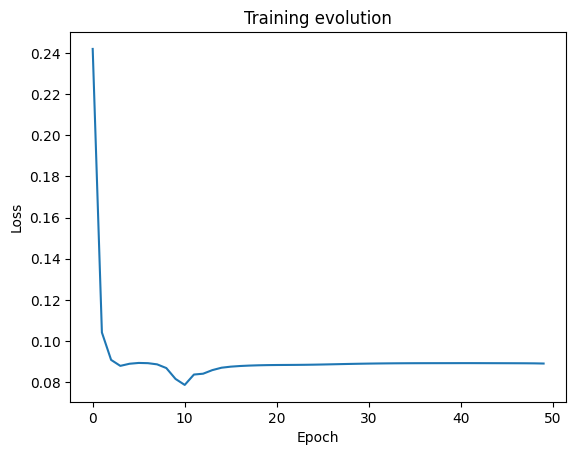

In [4]:
# Création du modèle MLP
mlp = MLP(input_size=4, hidden_sizes=[5], output_size=3)

# Entraînement du modèle
losses = mlp.train(X_train, y_train, epochs=1000, learning_rate=0.1)

plt.plot(losses)
plt.title("Training evolution")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Model evaluation

In [5]:
# Prédictions sur l'ensemble de test
y_pred = mlp.predict(X_test)

# Conversion des sorties en labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calcul de l'accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 80.00%


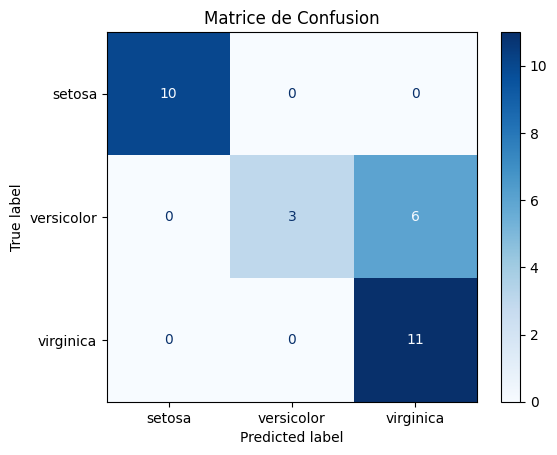

In [6]:
# Matrice de confusion
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()